# Exploring Prosper Loan Dataset

## by Linda Chang

## Dataset Overview

>Prosper is a peer-to-peer lending platform and this dataset contains loan data across time.Check out the full description [here](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Optimize pandas display options for viewing and analyzing the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
# load the dataset into the pandas dataframe and check the columns
df=pd.read_csv('prosperLoanData.csv')
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                             object 
ListingNumber                          int64  
ListingCreationDate                    object 
CreditGrade                            object 
Term                                   int64  
LoanStatus                             object 
ClosedDate                             object 
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                  object 
ProsperScore                           float64
ListingCategory (numeric)              int64  
BorrowerState                          object 
Occupation                             object 
EmploymentStatus                       object 
EmploymentStatusDuration               float64


In [4]:
#View the first 5 row
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### What is the structure of this dataset?

> This dataset contains over 113,937 loans with 81 variables on each loan, including loan amount,borrow rate(or interest rate),current loan status, borrower income and many others. Some variables are numeric in nature or boolean, and others ordered categorical variables. 

### What are the main featuresof interest?
 
> What factors affect a loan's outcome status? And What factors affect the APR (interest rate) for borrowers?
### What variables in the dataset will help support the investigation into my features of interest?

> I will focus my analysis on loan status, borrower APR, ProsperScore, employment status, employment duration,debt to income ratio, income range,original amount and % of trades never delinquent.

In [5]:
#Select my features of interest and create a sub dataset
cols=['ListingNumber','LoanStatus','BorrowerAPR','ProsperScore',
      'EmploymentStatus','EmploymentStatusDuration','TradesNeverDelinquent (percentage)','DebtToIncomeRatio',
     'IncomeRange','LoanOriginalAmount']
prosper=df[cols].dropna()
#Change all column names to lowercase, and shorten long column names 
prosper.rename(columns={'ListingNumber':'id','LoanStatus':'Status','ProsperScore':'prosper_score',
                        'EmploymentStatus':'employment','EmploymentStatusDuration':'job_duration',
                        'TradesNeverDelinquent (percentage)':'non-delinquency','DebtToIncomeRatio':'debt/income',
                        'IncomeRange':'income_range','LoanOriginalAmount':'ori_Amount'},inplace=True)
prosper.columns=[x.lower() for x in prosper.columns]
prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 10 columns):
id                 77543 non-null int64
status             77543 non-null object
borrowerapr        77543 non-null float64
prosper_score      77543 non-null float64
employment         77543 non-null object
job_duration       77543 non-null float64
non-delinquency    77543 non-null float64
debt/income        77543 non-null float64
income_range       77543 non-null object
ori_amount         77543 non-null int64
dtypes: float64(5), int64(2), object(3)
memory usage: 6.5+ MB


In [6]:
prosper.head()

,id,status,borrowerapr,prosper_score,employment,job_duration,non-delinquency,debt/income,income_range,ori_amount
1,1209647,Current,0.12016,7.0,Employed,44.0,1.00,0.18,"$50,000-74,999",10000
3,658116,Current,0.12528,9.0,Employed,113.0,0.76,0.15,"$25,000-49,999",10000
4,909464,Current,0.24614,4.0,Employed,44.0,0.95,0.26,"$100,000+",15000
5,1074836,Current,0.15425,10.0,Employed,82.0,1.00,0.36,"$100,000+",15000
6,750899,Current,0.31032,2.0,Employed,172.0,0.68,0.27,"$25,000-49,999",3000


## Univariate Exploration

**I will start by looking at the main variable of interest: loan status**

In [7]:
#Caculate the percentage of loans per outcome
loan_status=(prosper.status.value_counts()/len(prosper))*100
loan_status

Current                   67.663103
Completed                 22.826045
Chargedoff                5.731014 
Defaulted                 1.141302 
Past Due (1-15 days)      0.931096 
Past Due (31-60 days)     0.421702 
Past Due (91-120 days)    0.357221 
Past Due (61-90 days)     0.354642 
Past Due (16-30 days)     0.312085 
FinalPaymentInProgress    0.243736 
Past Due (>120 days)      0.018054 
Name: status, dtype: float64

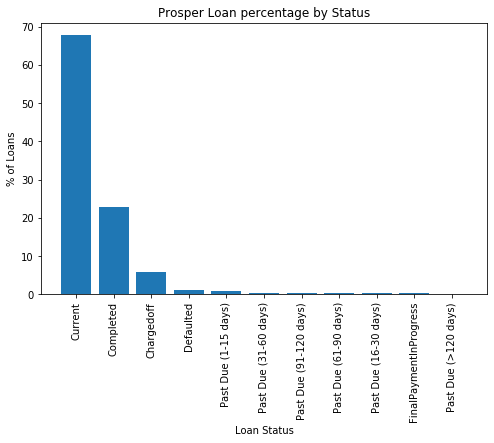

In [8]:
plt.figure(figsize=[8, 5])
plt.bar(x=loan_status.index,height=loan_status)
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.ylabel('% of Loans')
plt.title('Prosper Loan percentage by Status')
plt.show();

### The Distribution of Loan Status
> Almost 70% of the loans are current, and over 20% are complete. Less than 10% are charged off, defaulted or past due.

**Next, I will move on to the intererat rates on the loan.**

In [9]:
#Scale the interest rate for better visulisation and look at the statistics for Borrower APR 
prosper.borrowerapr=prosper.borrowerapr*100
prosper.borrowerapr.describe()

count    77543.000000
mean     22.372734   
std      7.915865    
min      4.583000    
25%      16.175000   
50%      21.566000   
75%      28.780000   
max      42.395000   
Name: borrowerapr, dtype: float64

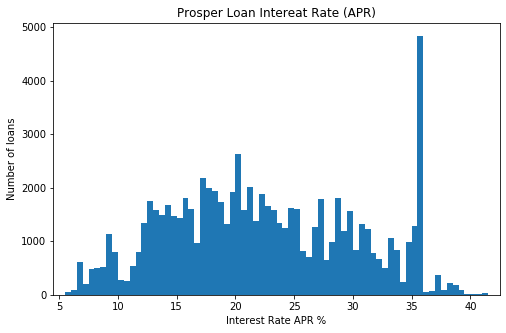

In [10]:
plt.figure(figsize=[8, 5])
bin_edges=np.arange(4.5,42.5,0.5)
plt.hist(prosper.borrowerapr,bin_edges)
plt.xlabel('Interest Rate APR %')
plt.ylabel('Number of loans')
plt.ylabel
plt.xlim([4.5,42.5])
plt.title('Prosper Loan Intereat Rate ( Borrower APR)')
plt.show();

### The Distribution of Borrower APR
> The distribution of annual interest rate that borrowers incur looks roughly bimodal. There are a peak around 20% and the second peak around 35%. The majority of the rates fall in the range of 12.5% to 37%.

**What is the distribution of original loan amount?**

In [11]:
#Examine the distribution of original loan amount with histogram
#Check the statistics first
prosper.ori_amount.describe()

count    77543.000000
mean     9269.504688 
std      6398.196398 
min      1000.000000 
25%      4000.000000 
50%      8000.000000 
75%      14500.000000
max      35000.000000
Name: ori_amount, dtype: float64

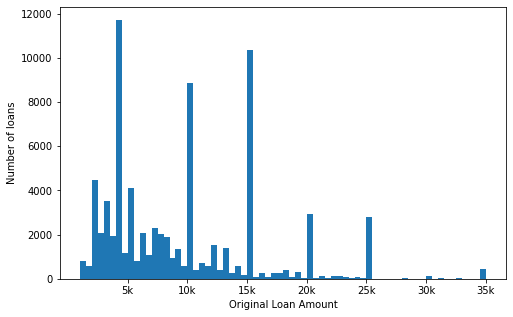

In [12]:
#Plot the original loan amount
plt.figure(figsize=[8, 5])
bin_edges=np.arange(prosper.ori_amount.min(),prosper.ori_amount.max()+500,500)
plt.hist(prosper.ori_amount,bins=bin_edges)
plt.xticks([5000,10000,15000,20000,25000,30000,35000],['5k','10k','15k','20k','25k','30k','35k'])
plt.ylabel('Number of loans')
plt.xlabel('Original Loan Amount')
plt.show();

### The Distribution of Original Loan Amount
> There are large spikes in frequency at 5k, 10k, 15k and 20k/25k to a lesser extent. They probably represent the focal points as it is less likely for someone to ask for 14,999 compared to 15,000. Most loans are less than or equal to 25k

**Now, it is time to examine the predictor variables. Let's look at Prosper Score first.**

In [13]:
#Find the rating proportions
rating_prop=100*(prosper.prosper_score.value_counts().sort_index())/len(prosper)

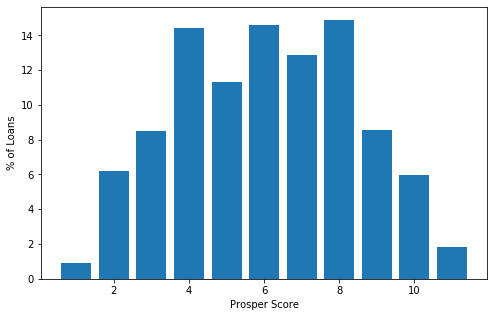

In [14]:
plt.figure(figsize=[8, 5])
plt.bar(x=rating_prop.index,height=rating_prop)
plt.xlabel('Prosper Score')
plt.ylabel('% of Loans')
plt.show();

### The distribution  of Prosper Score
> It is roughly a bell shaped curve. The majority of Prosper Scores fall between 4-8. Something is odd here and I don't have the answer.By definition, the Prosper Score ranges from 1 to 10, where does 11 come from? There are more than 1000 loans with rating of 11. Does Prosper go the extra miles to highlight these loans? It requires further investigation with more data.

In [15]:
#The maxium score should be 10 by definition, but 2% of the loans have a rating of 11. What happened here?
prosper.query('prosper_score==11').describe()

,id,borrowerapr,prosper_score,job_duration,non-delinquency,debt/income,ori_amount
count,1.412000e+03,1412.000000,1412.0,1412.000000,1412.000000,1412.000000,1412.000000
mean,1.066522e+06,11.206377,11.0,109.055241,0.960701,0.200666,14999.871813
std,9.513033e+04,3.491019,0.0,98.547400,0.073615,0.093932,8212.501059
min,7.019420e+05,6.726000,11.0,0.000000,0.370000,0.020000,2000.000000
25%,9.932198e+05,7.922000,11.0,33.000000,0.950000,0.130000,9000.000000
50%,1.063547e+06,10.038000,11.0,80.000000,1.000000,0.190000,15000.000000
75%,1.142691e+06,13.799000,11.0,156.000000,1.000000,0.250000,20000.000000
max,1.252770e+06,22.415000,11.0,544.000000,1.000000,0.580000,35000.000000


In [16]:
#Are borrowers from a higher income bracket?
prosper.query('prosper_score==11').income_range.value_counts()

$100,000+         626
$50,000-74,999    357
$75,000-99,999    305
$25,000-49,999    118
$1-24,999         6  
Name: income_range, dtype: int64

> It is very likely that these are typos but I cannot determine what the correct values are. It accounts for 2% of the data so it's better to drop them.

In [17]:
#Drop the rows with Prosper Score of 11
prosper=prosper[prosper.prosper_score!=11]
prosper.shape

(76131, 10)

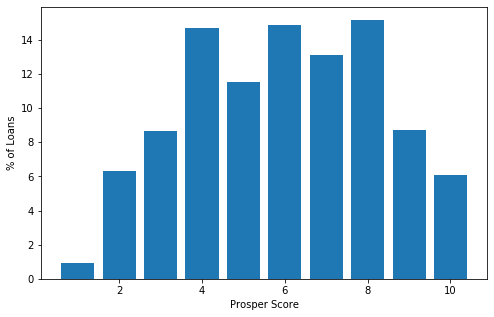

In [18]:
#Plot again 
rating_prop=100*(prosper.prosper_score.value_counts().sort_index())/len(prosper)
plt.figure(figsize=[8, 5])
plt.bar(x=rating_prop.index,height=rating_prop)
plt.xlabel('Prosper Score')
plt.ylabel('% of Loans')
plt.show();

### The Distribution of Prosper Score
> Now all the scores fall in the range of 1-10. 4,6,8 are the most common scores

**What about the borrowers' job status, duration and income range?**

In [19]:
prosper.employment.value_counts()

Employed         64518
Full-time        7565 
Other            3486 
Retired          320  
Part-time        199  
Self-employed    42   
Not employed     1    
Name: employment, dtype: int64

In [20]:
prosper.query('employment=="Other"').sample(10)

,id,status,borrowerapr,prosper_score,employment,job_duration,non-delinquency,debt/income,income_range,ori_amount
73707,1166367,Current,23.293,4.0,Other,0.0,0.65,0.29,"$1-24,999",3000
32491,491510,Chargedoff,35.643,5.0,Other,0.0,0.80,0.28,"$25,000-49,999",2500
6632,724757,Current,29.167,2.0,Other,82.0,1.00,0.35,"$50,000-74,999",4000
82318,1058106,Current,18.990,5.0,Other,65.0,1.00,0.21,"$1-24,999",4000
44793,575895,Chargedoff,35.797,5.0,Other,3.0,0.57,0.07,"$25,000-49,999",4000
63941,528004,Completed,35.643,4.0,Other,31.0,1.00,0.21,"$1-24,999",4500
84803,1160114,Current,21.166,4.0,Other,0.0,1.00,0.38,"$25,000-49,999",13750
110683,646743,Completed,30.461,6.0,Other,2.0,0.88,0.11,"$50,000-74,999",2000
5899,637774,Current,35.797,5.0,Other,275.0,0.95,0.24,"$25,000-49,999",2000
71463,543697,Current,28.974,5.0,Other,187.0,1.00,1.15,"$25,000-49,999",10000


>The classficiation is clearly defined as those in "Employed" can be full-time or part-time or even self-employed. 'Others' is also ambiguous. Only 1 is not employed. It is not worth creating a visualisation with an ambiguous classification. Look at income_range and job_duration instead.

In [21]:
#Discard the employment column
prosper.drop('employment',axis=1,inplace=True)

In [22]:
#Check the statistics for job duration:
prosper.job_duration.describe()

count    76131.000000
mean     104.151463  
std      96.756478   
min      0.000000    
25%      31.000000   
50%      75.000000   
75%      149.000000  
max      755.000000  
Name: job_duration, dtype: float64

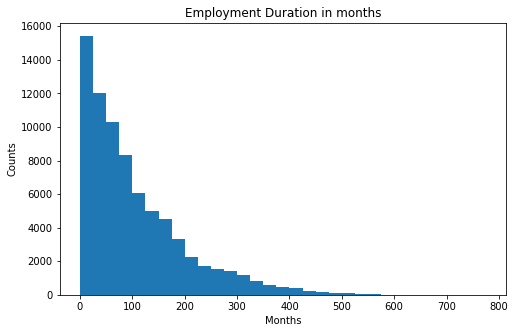

In [23]:
#Plot the distribution
plt.figure(figsize=[8, 5])
bin_edges=np.arange(prosper.job_duration.min(),prosper.job_duration.max()+25,25)
plt.hist(prosper.job_duration,bins=bin_edges)
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title("Employment Duration in months")
plt.show();

### The Distribution of Employment Duration
>There is a long tail.The majority of employment history is less than 20 years(240 months). Let's plot the distribution again after the log transformation.

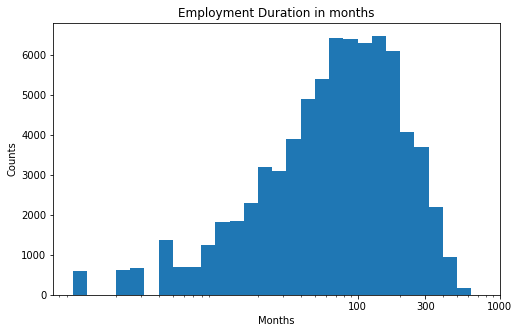

In [24]:
#Use log transformation and plot the distribution again
plt.figure(figsize=[8, 5])
bin_edges = 10 ** np.arange(0, np.log10(prosper.job_duration.max()),0.1)
plt.hist(prosper.job_duration, bins = bin_edges)
plt.xscale('log')
plt.xticks([100,300,1000],[100,300,1000])
plt.ylabel('Counts')
plt.title("Employment Duration in months")
plt.xlabel('Months')
plt.show();

### The Distribution of Employment Duration (post log transformation)
> The distribution is bell-curved and negatively skewed after the log transformation. More than half of the loans were originated by individuals with less than 10 years employment history.

What about the income ranges?

In [25]:
#Check the counts for every income range
prosper.income_range.value_counts()

$50,000-74,999    23669
$25,000-49,999    21900
$100,000+         13390
$75,000-99,999    13337
$1-24,999         3834 
Not employed      1    
Name: income_range, dtype: int64

In [26]:
#There is only 1 unemployed. Remove it
prosper=prosper.query('income_range!="not employed"')

In [27]:
#Make income range an ordered categorical variable
income_class=['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
income_class_var=pd.CategoricalDtype(ordered = True,categories=income_class)
prosper.income_range=prosper.income_range.astype(income_class_var)

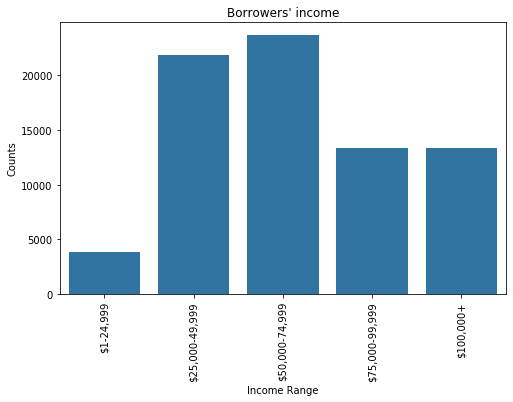

In [28]:
plt.figure(figsize=[8, 5])
base_color=sns.color_palette()[0]
sns.countplot(data=prosper, x='income_range',color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Income Range')
plt.ylabel('Counts')
plt.title("Borrowers' income");

### The Distribution of Income Range
> Most loans are orignated by people with income great than 25k. There are almost 15k loans from people with an income greater than 100k.

**Finally, borrower's debt to income ratio and percentage of non-delinquency trades previously**

In [29]:
#Check the statistics for debt to income ratio
prosper['debt/income'].describe()

count    76131.000000
mean     0.259817    
std      0.320932    
min      0.000000    
25%      0.150000    
50%      0.220000    
75%      0.320000    
max      10.010000   
Name: debt/income, dtype: float64

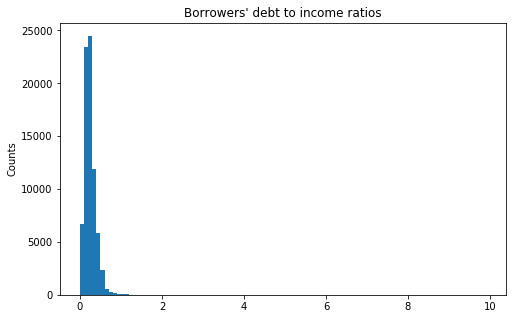

In [86]:
#Plot the debt to income ratio
plt.figure(figsize=[8,5])
bin_edges=np.arange(0,10,0.1)
plt.hist(data=prosper,x='debt/income',bins=bin_edges)
plt.ylabel('Counts')
plt.title("Borrowers' debt to income ratios")
plt.show();

### The Distribution of Debt/Income Ratio
> Most loans are from applicants with a debt to income ratio less than 1. There is a long tail though. Use a log transformation and plot it again.

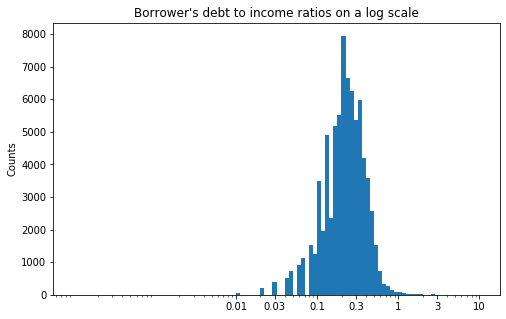

In [31]:
#Plot the debt/income ratio after the log transformation
plt.figure(figsize=[8,5])
bin_edges = 10 ** np.arange(-4, np.log10(prosper['debt/income'].max()),0.05)
plt.hist(prosper['debt/income'], bins = bin_edges)
plt.xscale('log')
plt.xticks([0.01,0.03,0.1,0.3,1,3,10],[0.01,0.03,0.1,0.3,1,3,10])
plt.ylabel('Counts')
plt.title("Borrower's debt to income ratios on a log scale")
plt.show();

### The Distribution of Debt/Income Ratio (post log transformation)
> There is a peak between 0.1 and 0.3 after the log transformation. The distribution has a negative skew. The majority of loans are from applicants with a relatively low debt to income ratio

In [32]:
#Scale the percent by 100 for easy reference
prosper['non-delinquency']= prosper['non-delinquency']*100

In [33]:
#Check the statistics for the non-delinquency percentage
prosper['non-delinquency'].describe()

count    76131.000000
mean     90.389946   
std      12.230489   
min      8.000000    
25%      85.000000   
50%      95.000000   
75%      100.000000  
max      100.000000  
Name: non-delinquency, dtype: float64

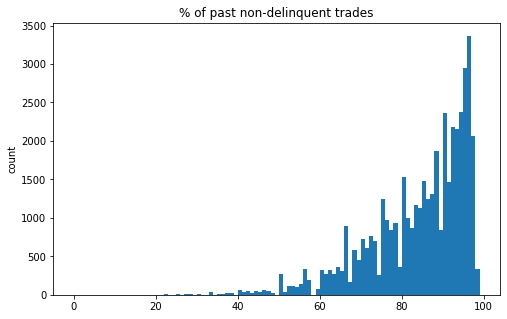

In [34]:
#Plot the distribution of non-delinquency ratio
plt.figure(figsize=[8, 5])
bin_edges=np.arange(0,100,1)
plt.hist(prosper['non-delinquency'],bins=bin_edges)
plt.title('% of past non-delinquent trades')
plt.ylabel('count');

### The Distribution of Non-delinquency Rate
> The peak in frequency is above 95 and the data has a long tail to the left. The distribution tells us that most of the borrowers have a very small percentage of delinquent trades previously.



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> Yes. Original loan amount has large spikes in frequency at 5k, 10k, 15k and 20k/25k to a lesser extent. They probably represent the focal points as it is less likely for someone to ask for 14,999 compared to 15,000. I performed log transformation for borrower's employment duration and debt-to-income ratio as both take a large range of values. Under the transformation, both data look bell-shaped with negative skewness. The majority of Prosper loans are from applicants with less than 20 years employment history and a relatively low debt to income ratio.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes. There are typos in the Prosper Score. The highest possible score is 10 but there are 11s in the datatset. For safety, I have removed them. Also, I change the "not employed" in the income range to "0" so that it is consistence with other income bracket. Employment status column is a bit messy too as the classfication is ambiguous. I will also exclude employment status in future analysis.

## Bivariate Exploration

**To start off with, I will look at the pairwise correlation between variables in the data.**

In [35]:
prosper.columns

Index(['id', 'status', 'borrowerapr', 'prosper_score', 'job_duration',
       'non-delinquency', 'debt/income', 'income_range', 'ori_amount'],
      dtype='object')

In [36]:
#Seperate the numerical variables from categorical variable
numeric_vars=['borrowerapr','job_duration','non-delinquency','debt/income','ori_amount']
#Treat prosper_score as ordinal categorical variable
categoric_vars=['status','prosper_score','income_range']

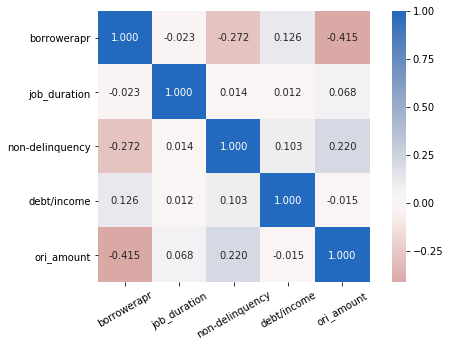

In [37]:
#Use heatmap to plot correlation
plt.figure(figsize=[8,5])
sns.heatmap(prosper[numeric_vars].corr(),annot=True,fmt='.3f',cmap='vlag_r',square=True,center=0)
plt.xticks(rotation=30)
plt.show();

### Correlations between the Numerical Variables 
> Except for interest rate vs original loan amount, and interest rate vs non-delinquency, the correlations are pretty low. Use the scatter plot to view these two pairs again. 

/Users/ychlinda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


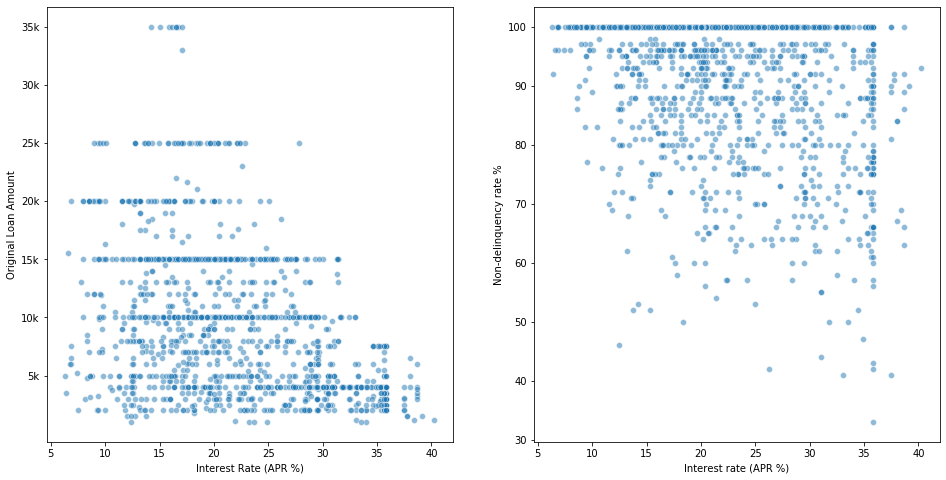

In [38]:
#Show scatterplots for APR vs original loan amount and APR vs non-delinquency rate
#Randomly select 5,000 samples for fast rendering and more visible patterns 
plt.figure(figsize=[16,8])
samples=np.random.choice(prosper.shape[0],2000,replace=False)
prosper_samples=prosper.loc[samples,:]

ax1=plt.subplot(1,2,1)
sns.scatterplot(data=prosper_samples,y='ori_amount',x='borrowerapr',x_jitter=0.5, y_jitter=100,alpha=0.5)
ax1.set_xlabel('Interest Rate (APR %)')
ax1.set_yticks([5000,10000,15000,20000,25000,30000,35000])
ax1.set_yticklabels(['5k','10k','15k','20k','25k','30k','35k'])
ax1.set_ylabel('Original Loan Amount')

ax2=plt.subplot(1,2,2)
sns.scatterplot(data=prosper_samples,y='non-delinquency',x='borrowerapr',x_jitter=0.5,y_jitter=2,alpha=0.5)
ax2.set_xlabel('Interest rate (APR %)')
ax2.set_ylabel('Non-delinquency rate %');

### The Relationship between APR and Loan Amount, and APR and Non-delinquency Rate
> Interest Rate has a medium negative correlation with original amount, and a small negative correlation with the non-delinquency rate. Interest rate is more likely to be higher than smaller loans.

Next, I will look at how numerical variables correlates with categorical variables

In [39]:
#Change the loan status column to an ordinal categorical variable
stat=['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)',
     'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Chargedoff']
stat_cat=pd.CategoricalDtype(ordered=True,categories=stat)
prosper.status=prosper.status.astype(stat_cat);

<Figure size 576x576 with 0 Axes>

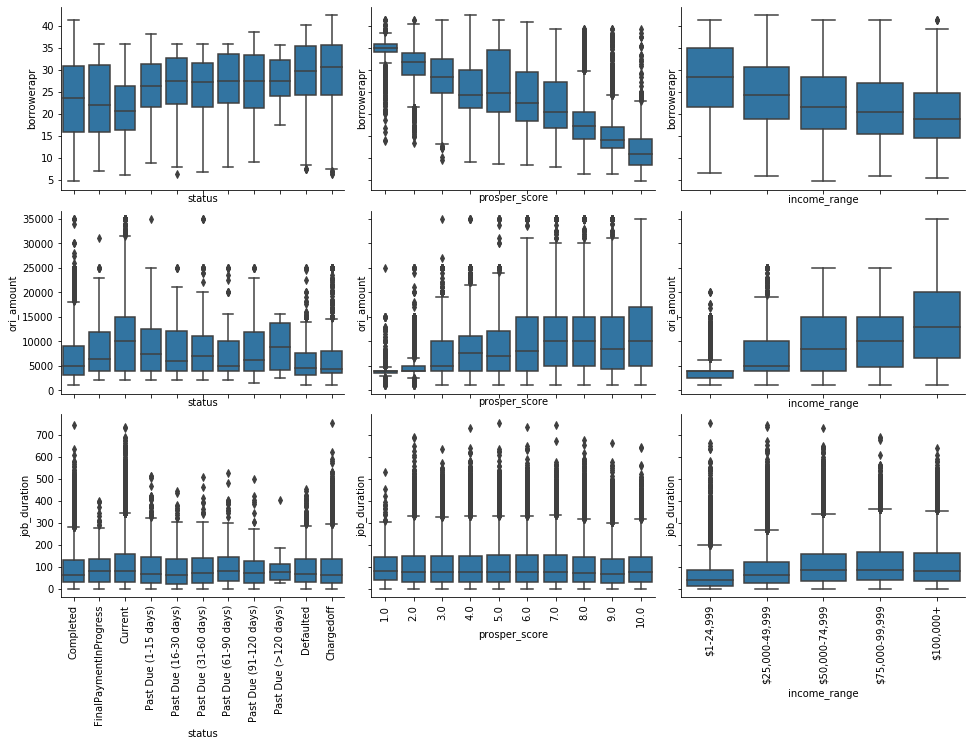

In [40]:
# plot matrix of numeric features against categorical features.
def boxgrid(x, y, **kwargs):
    base_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = base_color)

plt.figure(figsize = [8, 8])
g = sns.PairGrid(data = prosper, y_vars = ['borrowerapr','ori_amount','job_duration'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
        
# Show labels for each subplot
xlabels,ylabels = [],[]
for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])
        
#Rotate the text so that they are legible 
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), visible=True)
    for label in ax.get_xticklabels():
        label.set_rotation(90)        

plt.show();

### The relationships between selected numerical variables and categorical variables
> 1. Interest rate has a negative relationship with Prosper score and income. It makes sense intuitively, as borrowing rate is lower for high-ranking loans (low risk) and individuals from high-income brackets. In general, interest rates are also higher for past-due, defaulted and charged off loans.
> 2. Original loan amount has a positive relationship withh Prosper score and income. Interestingly, loans that are charged-off or defaulted tend to be small. This is worthy of further investigation with more data points.
> 3. Job durations don't seem to have a meaningful relationship with Prosper Score or loan status. It has a positive relationship with income, which means, people with more experience tend to earn more. However, our research interest is focused on loans in this analysis so we will not look at the interactions between job experience and income.

<Figure size 720x720 with 0 Axes>

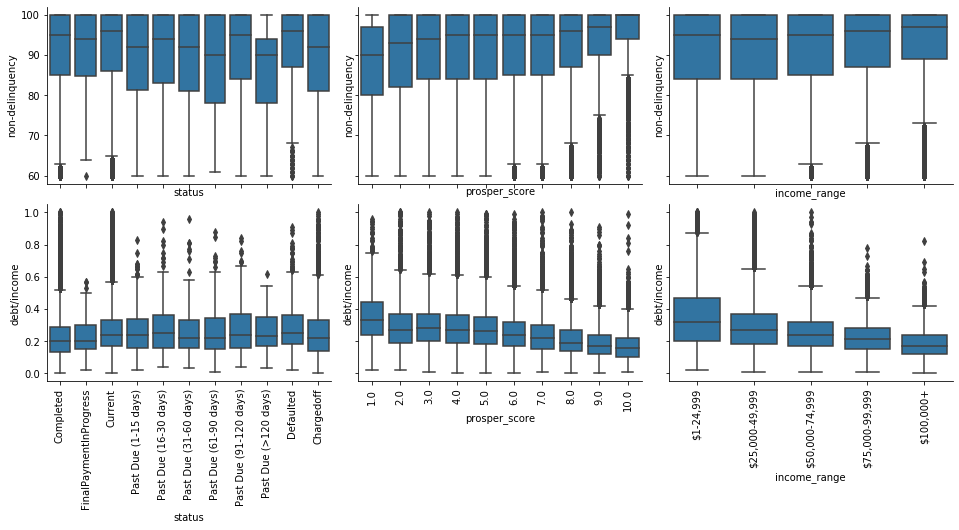

In [41]:
# plot matrix of numeric features against categorical features.
# Debt/income ratio has a very long tail but most values are equal to or less than 1.
# Only include the data points < 1 here
# Non-delinquency ratio also has a very long tail but most values are between 60 to 100. 
# Only include the data points between 60 to 100 here.

prosper_sub=prosper[prosper['debt/income']<=1 & (prosper['non-delinquency']>=60)]

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = prosper_sub, y_vars = ['non-delinquency','debt/income'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
        
# Show labels for each subplot
xlabels,ylabels = [],[]
for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])
        
#Rotate the text so that they are legible 
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), visible=True)
    for label in ax.get_xticklabels():
        label.set_rotation(90)        

plt.show();


> 1. Non-delinquency rate has a positive relationship with the Prosper Score and income. Bad loans are not necessarily from individuals with a lower non-delinquency rate. 
> 2. Debt/Income ratio has a negative relationship with Prosper Score and Income Range. The relationship between debt ratio and loan status is not discernable.

**Finally, I will look at the relationship between categorical variables.**

No handles with labels found to put in legend.


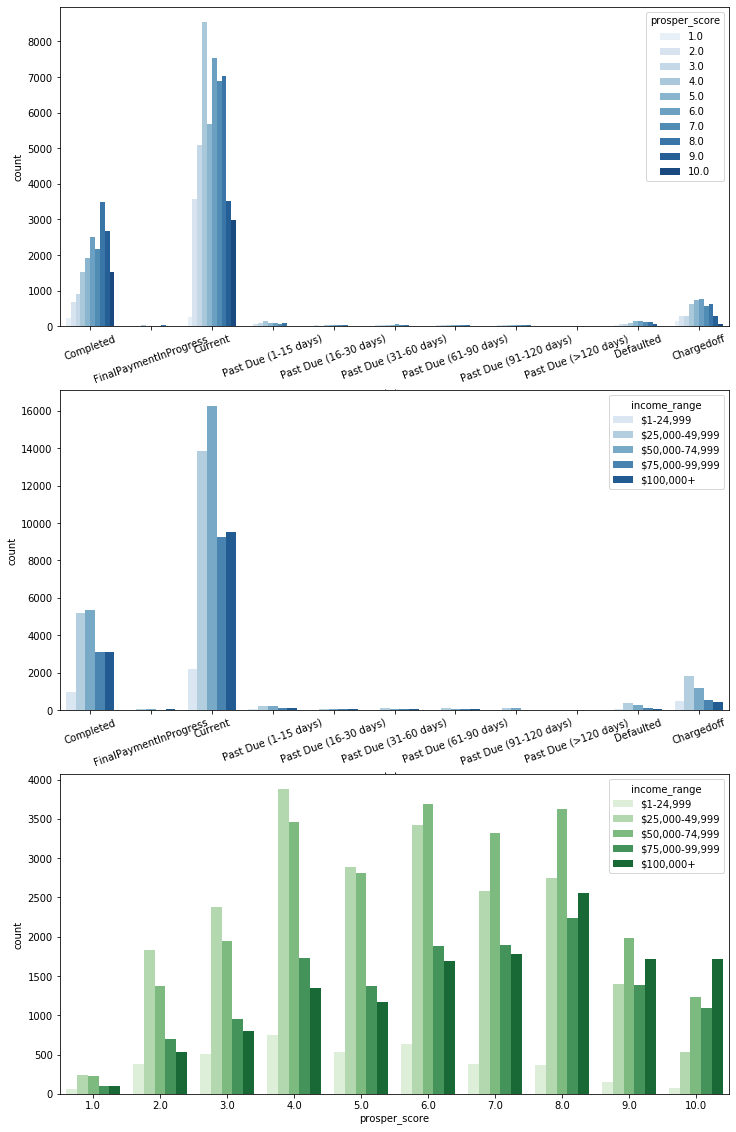

In [42]:
plt.figure(figsize=[12,20])

#Subplot 1: Status vs Prosper Score
ax1=plt.subplot(3,1,1)
g1=sns.countplot(data=prosper,x='status',hue='prosper_score',palette='Blues')
for item in g1.get_xticklabels():
    item.set_rotation(20)

# subplot 2: Status vs Income Range
ax2 = plt.subplot(3,1,2)
g2=sns.countplot(data=prosper,x='status',hue='income_range',palette="Blues")
for item in g2.get_xticklabels():
    item.set_rotation(20)

# subplot 3: Prosper Score and Income Range
ax3 = plt.subplot(3,1,3)
g3=sns.countplot(data=prosper, x ='prosper_score', hue = 'income_range', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)

plt.show();


### The interactions between categorical variables
> There is no much interaction between loan status and other two categorical variables income range and prosper score. There is large interactions between income range and prosper score. Loans originated from high-income individuals tend to have higher prosper scores.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Interest Rate has a medium negative correlation with original amount. Borrower APR tend to be higher for smaller loans.
> 2. Interest rate has a negative relationship with Prosper score and income. In other words, borrowing rate is lower for high-ranking loans (low risk) and individuals from high-income brackets. In general, interest rates are also higher for past-due, defaulted and charged off loans.
> 3. Original loan amount has a positive relationship withh Prosper score and income. Interestingly, loans that are charged-off or defaulted tend to be small. This is worthy of further investigation in the next section.
> 4. Non-delinquency rate has a positive relationship with the Prosper Score and income.
> 5. Debt/Income ratio has a negative relationship with Prosper Score and Income Range.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Job duration doesn't have a meaningful relationship with Prosper Score or loan status. It has a positive relationship with income. However, our research interest is focused on loans in this analysis so we will not look at the interactions between job experience and income.

## Multivariate Exploration


**In this section, I want to look at how each categorical variables play into the relationship between original loan amount and borrower APR.**

In [43]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(4.5,42.5,1)
    bins_y = np.arange(prosper.ori_amount.min(),prosper.ori_amount.max(),1000)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.yticks([5000,10000,15000,20000,25000,30000,35000],['5k','10k','15k','20k','25k','30k','35k'])

<Figure size 720x576 with 0 Axes>

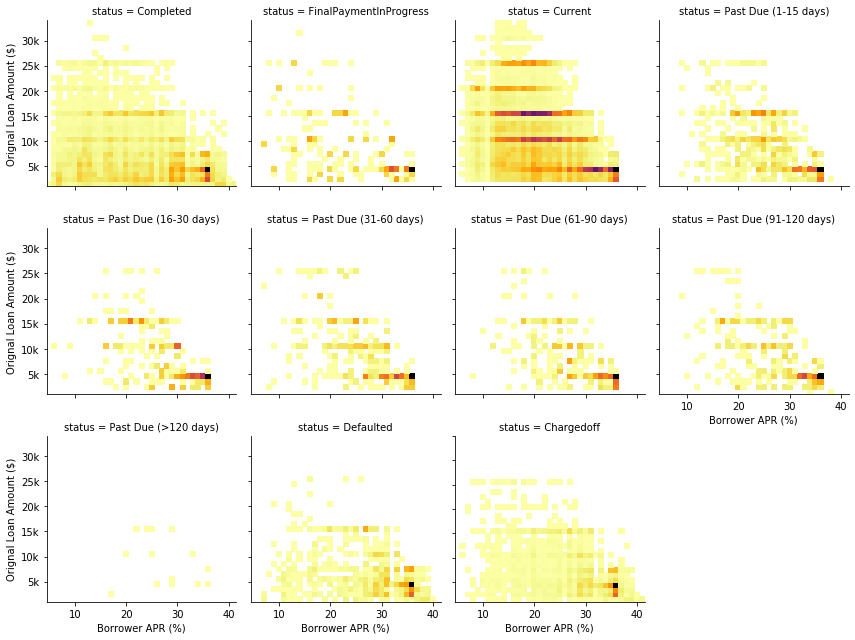

In [44]:
# create faceted heat maps on each loan status
plt.figure(figsize=[10,8])
g = sns.FacetGrid(data = prosper, col = 'status', col_wrap = 4, height = 3,
                 xlim = [4.5,42.5])
g.map(hist2dgrid,'borrowerapr', 'ori_amount', color = 'inferno_r')
g.set_xlabels('Borrower APR (%)')
g.set_ylabels('Orignal Loan Amount ($)')

plt.show();

### How loan status plays into the relationship between original loan amount and borrower APR?
> Compared to the current loans, charged-off and defaulted loan are normally small and high interest bearing. Completed loans also tend to be small.

<Figure size 720x576 with 0 Axes>

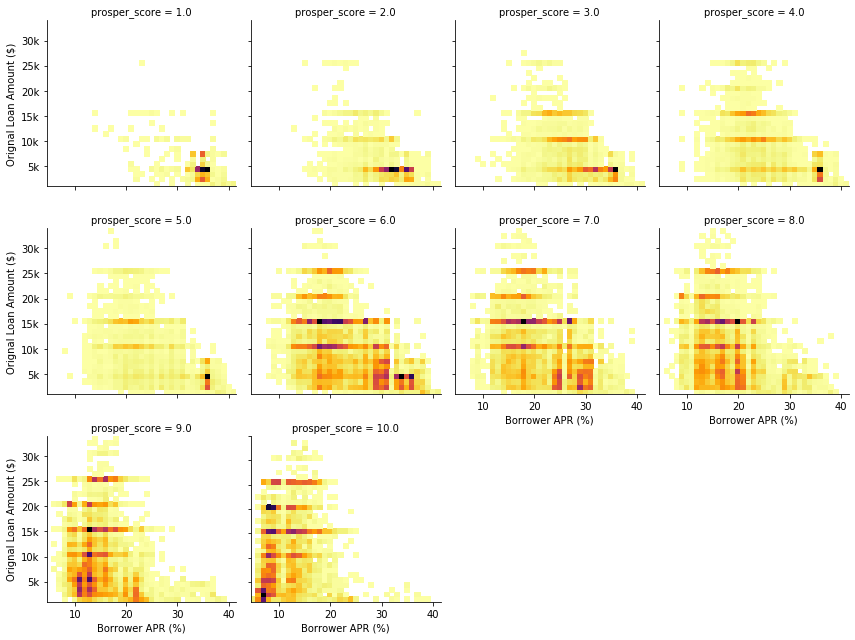

In [45]:
# create faceted heat maps on prosper score
plt.figure(figsize=[10,8])
g = sns.FacetGrid(data = prosper, col = 'prosper_score', col_wrap = 4, height = 3, xlim = [4.5,42.5])
g.map(hist2dgrid,'borrowerapr', 'ori_amount', color = 'inferno_r')
g.set_xlabels('Borrower APR (%)')
g.set_ylabels('Orignal Loan Amount ($)')

plt.show();

### How Prosper score plays into the relationship between original loan amount and borrower APR?
>  Original loan amount increases and interest rate decreases when prosper score increases. 

<Figure size 720x576 with 0 Axes>

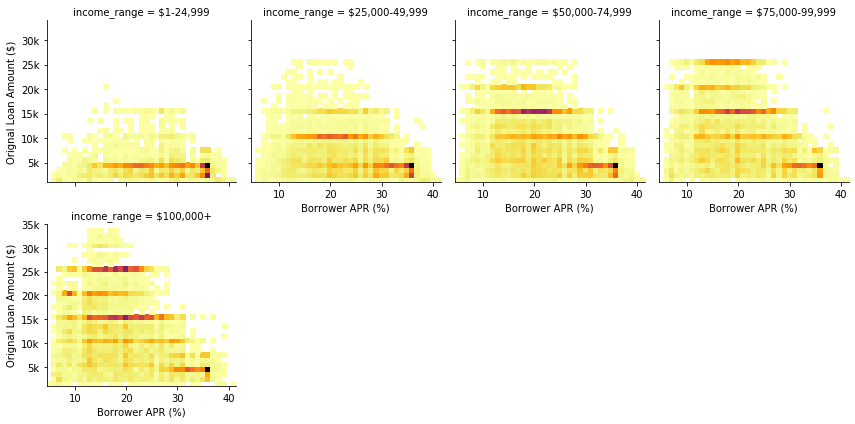

In [46]:
# create faceted heat maps on income range

plt.figure(figsize=[10,8])

g = sns.FacetGrid(data = prosper_sub, col = 'income_range', col_wrap = 4, height = 3, xlim = [4.5,42.5])
g.map(hist2dgrid,'borrowerapr', 'ori_amount', color = 'inferno_r')
g.set_xlabels('Borrower APR (%)')
g.set_ylabels('Orignal Loan Amount ($)')

plt.show()

### How income range plays into the relationship between original loan amount and borrower APR?
> As the income range increases, borrower APR declines and loan amount increases.

### There are a lot of USD 5000 and USD150,000 loans. What are the expected borrower APRs for these loans, given the levels of income range and propser score?

In [59]:
#Select the subsets
prosper_5k=prosper.query('ori_amount==5000')
prosper_15k=prosper.query('ori_amount==15000')

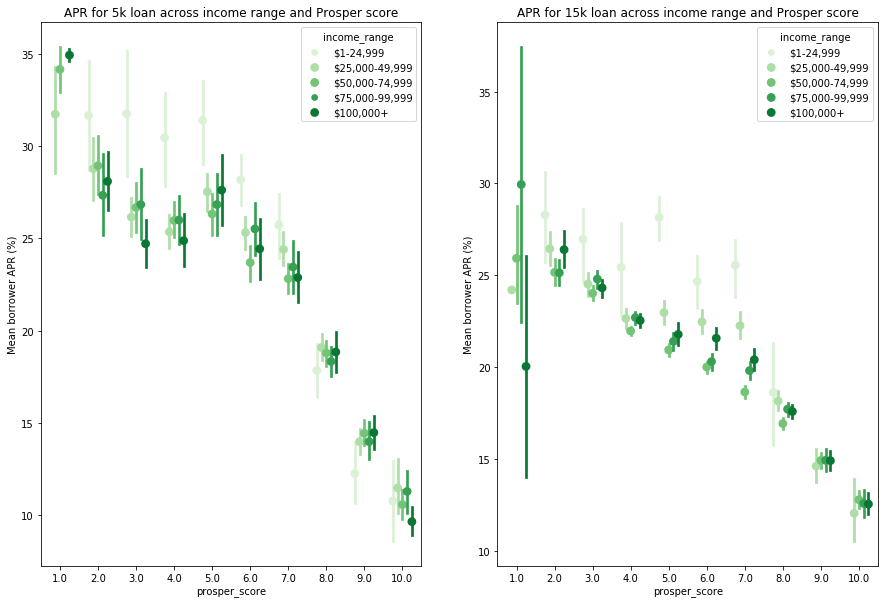

In [55]:
fig, ax = plt.subplots(ncols = 2, figsize = [15,10])

#Subplot 1: 5k loan
sns.pointplot(data=prosper_5k, x='prosper_score',y='borrowerapr',hue='income_range',palette='Greens',
             linstyles='',dodge=0.5,ax=ax[0],join=False)
ax[0].set_title('APR for 5k loan across income range and Prosper score')
ax[0].set_ylabel('Mean borrower APR (%)')

#Subplot 2: 15k loan
sns.pointplot(data=prosper_15k,x='prosper_score',y='borrowerapr',hue='income_range',palette='Greens',
              linstyles='',dodge=0.5,ax=ax[1],join=False)
ax[1].set_title('APR for 15k loan across income range and Prosper score')
ax[1].set_ylabel('Mean borrower APR (%)') 

plt.show();

> For USD5,000 and USD15,000 loans (the most popular on Prosper), borrower APR are noticeably lower for high-rating loans. Nevertheless, APR may not decline further after income passes a certain theshold: with the same prosper score, those in the income range of 100,000+ may not incur a lower APR than those in the range of 50,000-74,999. 

### There are a lot of loans with APR around 35% and around 20%. What are the expected loan amounts given the levels of income range and propser score?

In [84]:
#Select the subsets
prosper_20pct=prosper.query('(borrowerapr>=19.5) & (borrowerapr<=20.5)')
prosper_35pct=prosper.query('(borrowerapr>=34.5) & (borrowerapr<=35.5)')

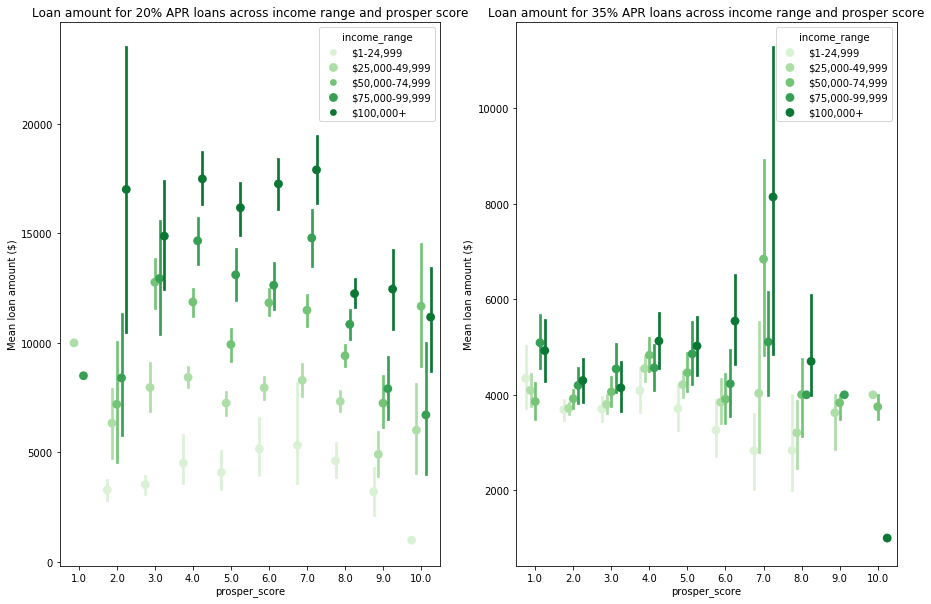

In [85]:
fig,ax=plt.subplots(ncols=2,figsize=[15,10])

#Subplot 1: 20% loans 
sns.pointplot(data=prosper_20pct,x='prosper_score',y= 'ori_amount', hue='income_range',palette='Greens',
             ax=ax[0],join=False,dodge=0.5)
ax[0].set_title('Loan amount for 20% APR loans across income range and prosper score')
ax[0].set_ylabel('Mean loan amount ($)')

#Subplot 2: 35% loans 
sns.pointplot(data=prosper_35pct,x='prosper_score',y='ori_amount',hue='income_range',palette='Greens',
             ax=ax[1],join=False,dodge=0.5)
ax[1].set_title('Loan amount for 35% APR loans across income range and prosper score')
ax[1].set_ylabel('Mean loan amount ($)')

plt.show();

> With a 20% APR, the mean loan amount differentials aross income range are much bigger at a low and medium prosper score than at a high score. Conversely, for loans with an APR of 35%, mean loan amount doesn't vary considerable across different income brackets at a low prosper score. At a medium prosper score (6-8), high income borrowers pocket in much bigger amounts than low income counterparts. For loans with 35% APR, the range of mean loan amounts are also smaller compared to loans with 20% APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1.Compared to the current loans, charged-off and defaulted loan are normally small and high interest bearing. Completed loans also tend to be small.

> 2.Original loan amount increases and interest rate decreases when prosper score increases. 

> 3.As the income range increases, borrower APR declines and loan amount increases.

### Were there any interesting or surprising interactions between features?

> For USD5,000 and USD15,000 loans (the most popular on Prosper), borrower APR are noticeably lower for high-rating loans. Nevertheless, APR may not decline further after income passes a certain theshold. In some cases, those in the income range of 100,000+ may incur a higher APR than those in the range of 50,000-74,999,with prosper score being equal.

> The mean loan amount differentials across income range at a given prosper score play differently for 20% and 35% APR loans. Perhaps loans with 35% APR are deemed very risky and the impacts of income range and prosper score on loan amounts are therefore muted.